### Load in modules and pickled df

In [1]:
# Import packages
import pandas as pd
import numpy as np
import pickle

# Stats and modeling packages
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
import scipy.stats as stats

# Visualization
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
# Yellowbrick plotting
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError


In [2]:
#!pip install yellowbrick

In [3]:
!ls

LR_Residual_Plot.png
LassoCV_Prediction_yellowbrickplot.png
LassoModelResiduals.png
Neg_Valence.txt
Pos_Valence.txt
Project 2 'Description' formatting + Valence + testdf.ipynb
Project 2 Census Scratch.ipynb
Project 2 Functions.ipynb
Project 2 Modeling.ipynb
Project 2 Scratch.ipynb
Project 2- Scraping.ipynb
df_with_zip_no_valence.pickle
nyc_df.pickle
nyc_df_cleaned.pickle
nyc_df_final.pickle


In [4]:
# To load pickle back in
with open('nyc_df_cleaned.pickle','rb') as read_file:
     model_df = pickle.load(read_file)

## Now the modeldf has zipcode (added 10-9), but removed valence count since it was very weak anyway

In [5]:
model_df.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,amenity_count,tourism_mentions
0,5.010635,Apartment,Entire_home/apt,3,1.0,Real_Bed,strict,True,t,100,f,2,100.0,11201,1.0,1.0,8,0
1,5.129899,Apartment,Entire_home/apt,7,1.0,Real_Bed,strict,True,f,100,t,6,93.0,10019,3.0,3.0,14,3
2,4.976734,Apartment,Entire_home/apt,5,1.0,Real_Bed,moderate,True,t,100,t,10,92.0,10027,1.0,3.0,18,0
10,4.605170,Apartment,Private_room,2,1.0,Real_Bed,strict,True,t,100,f,82,93.0,10009.0,1.0,1.0,14,0
18,4.882802,Apartment,Entire_home/apt,2,1.0,Real_Bed,strict,True,t,71,f,26,86.0,10002,1.0,2.0,18,0


In [6]:
model_df.shape

(31519, 18)

# Census work-- extracting useful info based on zipcode

In [7]:
from census import Census
from us import states
import pickle
import pandas as pd
import numpy as np
from uszipcode import SearchEngine

In [8]:
c = Census("unique_census_code_here")

In [14]:
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=False) # set simple_zipcode=False to use rich info database

Start downloading data for rich info zipcode database, total size 450+MB ...
  10 MB finished ...
  20 MB finished ...
  30 MB finished ...
  40 MB finished ...
  50 MB finished ...
  60 MB finished ...
  70 MB finished ...
  80 MB finished ...
  90 MB finished ...
  100 MB finished ...
  110 MB finished ...
  120 MB finished ...
  130 MB finished ...
  140 MB finished ...
  150 MB finished ...
  160 MB finished ...
  170 MB finished ...
  180 MB finished ...
  190 MB finished ...
  200 MB finished ...
  210 MB finished ...
  220 MB finished ...
  230 MB finished ...
  240 MB finished ...
  250 MB finished ...
  260 MB finished ...
  270 MB finished ...
  280 MB finished ...
  290 MB finished ...
  300 MB finished ...
  310 MB finished ...
  320 MB finished ...
  330 MB finished ...
  340 MB finished ...
  350 MB finished ...
  360 MB finished ...
  370 MB finished ...
  380 MB finished ...
  390 MB finished ...
  400 MB finished ...
  410 MB finished ...
  420 MB finished ...
  430 MB

## Function to extract useful info from census

In [15]:
# median_home_value = []
# for zipcode_entry in test_df['zipcode']:
#     #print(zipcode_entry)
#     zipcode_census_info = search.by_zipcode(zipcode_entry)
#     median_home_value.append(zipcode_census_info.median_home_value)
# print(median_home_value)

NameError: name 'test_df' is not defined

### not iterating correctly--- giving same val for all cols

In [17]:
def getHomeVal(zip_col):
    zipcode_census_info = search.by_zipcode(zip_col)
    i_home_val_list.append(zipcode_census_info.median_home_value)
    return zipcode_census_info.median_home_value

In [18]:
def getMedianIncome(zip_col):
    zipcode_census_info = search.by_zipcode(zip_col)
    #median_income.append(zipcode_census_info.median_household_income)
    return zipcode_census_info.median_household_income

In [19]:
model_df['median_home_val'] = model_df['zipcode'].apply(getHomeVal)

NameError: name 'i_home_val_list' is not defined

In [20]:
model_df['median_income'] = model_df['zipcode'].apply(getMedianIncome)

Exception ignored in: <function SearchEngine.__del__ at 0x1c20a5b4d0>
Traceback (most recent call last):
  File "/anaconda3/envs/metis/lib/python3.7/site-packages/uszipcode/search.py", line 100, in __del__
    if self.ses:
AttributeError: 'SearchEngine' object has no attribute 'ses'


KeyboardInterrupt: 

In [8]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31519 entries, 0 to 74109
Data columns (total 18 columns):
log_price                 31518 non-null float64
property_type             31519 non-null object
room_type                 31519 non-null object
accommodates              31519 non-null int64
bathrooms                 31422 non-null float64
bed_type                  31519 non-null object
cancellation_policy       31519 non-null object
cleaning_fee              31519 non-null bool
host_identity_verified    31519 non-null object
host_response_rate        31519 non-null int64
instant_bookable          31519 non-null object
number_of_reviews         31519 non-null int64
review_scores_rating      31519 non-null float64
zipcode                   31084 non-null object
bedrooms                  31473 non-null float64
beds                      31459 non-null float64
amenity_count             31519 non-null int64
tourism_mentions          31519 non-null int64
dtypes: bool(1), float64(5), 

# Explore correlations

In [496]:
model_df.corr()

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,number_of_reviews,review_scores_rating,bedrooms,beds,amenity_count,tourism_mentions,median_home_val,median_income
log_price,1.000000,0.553372,0.204927,0.139788,0.001205,0.006389,0.058079,0.346221,0.426047,0.191053,0.108654,0.427582,0.432314
accommodates,0.553372,1.000000,0.362007,0.187467,0.011148,0.109459,-0.072248,0.642851,0.809816,0.249945,0.030439,0.052778,0.064955
bathrooms,0.204927,0.362007,1.000000,0.034731,0.013066,-0.011683,-0.016031,0.425199,0.397892,0.124032,-0.033883,-0.003648,-0.005925
cleaning_fee,0.139788,0.187467,0.034731,1.000000,-0.007742,0.121136,-0.032283,0.089832,0.137179,0.227963,0.053248,0.061880,0.036725
host_response_rate,0.001205,0.011148,0.013066,-0.007742,1.000000,0.025366,0.033645,0.010697,0.019632,0.036173,0.010344,0.001120,-0.004386
number_of_reviews,0.006389,0.109459,-0.011683,0.121136,0.025366,1.000000,-0.128093,0.029549,0.093487,0.191447,0.047443,0.001238,-0.019888
review_scores_rating,0.058079,-0.072248,-0.016031,-0.032283,0.033645,-0.128093,1.000000,-0.025613,-0.065587,0.066542,-0.026987,0.025819,0.028412
bedrooms,0.346221,0.642851,0.425199,0.089832,0.010697,0.029549,-0.025613,1.000000,0.677158,0.145315,-0.027517,-0.030744,-0.050365
beds,0.426047,0.809816,0.397892,0.137179,0.019632,0.093487,-0.065587,0.677158,1.000000,0.221694,0.020977,0.017215,0.030261
amenity_count,0.191053,0.249945,0.124032,0.227963,0.036173,0.191447,0.066542,0.145315,0.221694,1.000000,0.062057,0.015968,0.052250


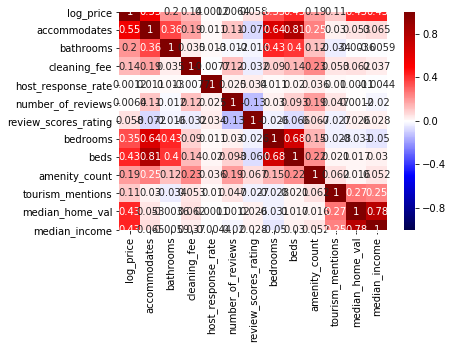

In [497]:
sns.heatmap(model_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1); # MUST SET VMIN /VMAX SO WE HAVE -1, 1 CORR RANGE

In [498]:
# Here we can see that there are very weak corrs with some of the features-- these should be dropped but I will try\
# some regularization to let it drop them. This is likely due to the fact that some of the features are very skewed and
# have low variance...could mess around with those later
model_df.corr()['log_price']

log_price               1.000000
accommodates            0.553372
bathrooms               0.204927
cleaning_fee            0.139788
host_response_rate      0.001205
number_of_reviews       0.006389
review_scores_rating    0.058079
bedrooms                0.346221
beds                    0.426047
amenity_count           0.191053
tourism_mentions        0.108654
median_home_val         0.427582
median_income           0.432314
Name: log_price, dtype: float64

Looks like newly added median home val and median income may contribute to the model pretty strongly.. There is a ton of missing data that I don't want to fill so I will make models separately with those two in them.

In [500]:
#model_df.corr()['tourism_mentions']

# Final Cleaning
#### Regular OLS model, pre regularization
- Including all features

In [501]:
model_df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'amenity_count', 'tourism_mentions', 'median_home_val',
       'median_income'],
      dtype='object')

#### Features that need to be converted to bool:
    - cleaning fee (done)
    - host identity verified
    - instant bookable (done)
#### Features that need to be converted to dummy:
    - property type
    - bed type-- actually going to just change to bed vs other, so it can then be 1,0 no need for dummies (done)
    - cancellation policy
    

#### Create dummies for variables with 2+ categorical. For those with only 2 (i.e. T/F) just recode them to 0, 1

In [502]:
def rename_tf(s):
    '''Converts string "f" or "t" to int (0,1, respectively)'''
    if s == 't':
        return 1
    elif s == 'f':
        return 0
    

In [503]:
model_df['instant_bookable'] = model_df['instant_bookable'].apply(rename_tf)

In [504]:
model_df['host_identity_verified'] = model_df['host_identity_verified'].apply(rename_tf)

In [505]:
# Cleaning fee was is True/False so need to apply separate function

In [506]:
def rename_truefalse(s):
    '''Converts string "f" or "t" to int (0,1, respectively)'''
    if s == True:
        return 1
    elif s == False:
        return 0

In [507]:
model_df['cleaning_fee'] = model_df['cleaning_fee'].apply(rename_truefalse)

In [508]:
#test_df = model_df.copy()

#### Clump "other" bed type. Real_Bed vs. Others

In [509]:
model_df.bed_type.value_counts()

Real_Bed         30601
Futon              360
Pull-out_Sofa      290
Airbed             178
Couch               90
Name: bed_type, dtype: int64

In [510]:
bed_dict = {'Other': ['Futon', 'Pull-out_Sofa', 'Airbed', 'Couch']}

In [511]:
bed_dict2 = {i : k for k, v in bed_dict.items() for i in v}

In [512]:
bed_dict2

{'Futon': 'Other',
 'Pull-out_Sofa': 'Other',
 'Airbed': 'Other',
 'Couch': 'Other'}

In [513]:
model_df['bed_type'].replace(bed_dict2,inplace=True)

In [514]:
model_df['bed_type'].value_counts()

Real_Bed    30601
Other         918
Name: bed_type, dtype: int64

In [515]:
model_df['bed_type'].replace({'Real_Bed':1, 'Other': 0},inplace=True)

In [516]:
model_df

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,amenity_count,tourism_mentions,median_home_val,median_income
0,5.010635,Apartment,Entire_home/apt,3,1.0,1,strict,1,1,100,0,2,100.0,11201,1.0,1.0,8,0,669000.0,95369.0
1,5.129899,Apartment,Entire_home/apt,7,1.0,1,strict,1,0,100,1,6,93.0,10019,3.0,3.0,14,3,808600.0,84424.0
2,4.976734,Apartment,Entire_home/apt,5,1.0,1,moderate,1,1,100,1,10,92.0,10027,1.0,3.0,18,0,716100.0,37872.0
10,4.605170,Apartment,Private_room,2,1.0,1,strict,1,1,100,0,82,93.0,10009.0,1.0,1.0,14,0,NaN,NaN
18,4.882802,Apartment,Entire_home/apt,2,1.0,1,strict,1,1,71,0,26,86.0,10002,1.0,2.0,18,0,535600.0,33218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74097,4.700480,Apartment,Private_room,2,1.0,1,flexible,1,1,100,1,31,92.0,10011.0,1.0,1.0,16,1,NaN,NaN
74100,4.605170,Apartment,Private_room,2,1.0,1,strict,1,1,100,0,32,93.0,11211.0,1.0,1.0,23,0,NaN,NaN
74106,4.605170,Apartment,Private_room,1,1.0,1,flexible,0,1,100,0,0,96.0,11206.0,1.0,1.0,1,0,NaN,NaN
74108,5.220356,Apartment,Entire_home/apt,5,1.0,1,moderate,1,1,100,1,43,94.0,11206.0,2.0,2.0,31,0,NaN,NaN


# Get dummies for cancellation_policy, property_type, bed_type

In [517]:
model_df = pd.get_dummies(model_df, columns=['cancellation_policy'], drop_first=True)

In [518]:
model_df = pd.get_dummies(model_df, columns=['property_type'], drop_first=True)

In [519]:
model_df = pd.get_dummies(model_df, columns=['room_type'], drop_first=True)

#### At this point the model_df should be ready to go-- it has been dummified

In [520]:
model_df

,log_price,accommodates,bathrooms,bed_type,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,amenity_count,tourism_mentions,median_home_val,median_income,cancellation_policy_moderate,cancellation_policy_strict,property_type_House,property_type_Other,room_type_Private_room,room_type_Shared_room
0,5.010635,3,1.0,1,1,1,100,0,2,100.0,...,8,0,669000.0,95369.0,0,1,0,0,0,0
1,5.129899,7,1.0,1,1,0,100,1,6,93.0,...,14,3,808600.0,84424.0,0,1,0,0,0,0
2,4.976734,5,1.0,1,1,1,100,1,10,92.0,...,18,0,716100.0,37872.0,1,0,0,0,0,0
10,4.605170,2,1.0,1,1,1,100,0,82,93.0,...,14,0,NaN,NaN,0,1,0,0,1,0
18,4.882802,2,1.0,1,1,1,71,0,26,86.0,...,18,0,535600.0,33218.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74097,4.700480,2,1.0,1,1,1,100,1,31,92.0,...,16,1,NaN,NaN,0,0,0,0,1,0
74100,4.605170,2,1.0,1,1,1,100,0,32,93.0,...,23,0,NaN,NaN,0,1,0,0,1,0
74106,4.605170,1,1.0,1,0,1,100,0,0,96.0,...,1,0,NaN,NaN,0,0,0,0,1,0
74108,5.220356,5,1.0,1,1,1,100,1,43,94.0,...,31,0,NaN,NaN,1,0,0,0,0,0


In [521]:
model_df.columns

Index(['log_price', 'accommodates', 'bathrooms', 'bed_type', 'cleaning_fee',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'amenity_count', 'tourism_mentions', 'median_home_val',
       'median_income', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'property_type_House',
       'property_type_Other', 'room_type_Private_room',
       'room_type_Shared_room'],
      dtype='object')

In [522]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31519 entries, 0 to 74109
Data columns (total 23 columns):
log_price                       31518 non-null float64
accommodates                    31519 non-null int64
bathrooms                       31422 non-null float64
bed_type                        31519 non-null int64
cleaning_fee                    31519 non-null int64
host_identity_verified          31519 non-null int64
host_response_rate              31519 non-null int64
instant_bookable                31519 non-null int64
number_of_reviews               31519 non-null int64
review_scores_rating            31519 non-null float64
zipcode                         31084 non-null object
bedrooms                        31473 non-null float64
beds                            31459 non-null float64
amenity_count                   31519 non-null int64
tourism_mentions                31519 non-null int64
median_home_val                 22926 non-null float64
median_income                 

# Further cleaning because there seems to still be missing values, 
- Going down variable list starting from log_price, make sure 31519 values for each

#### Log price-- where is the non-float one!

In [523]:
model_df[model_df['bathrooms'] == np.nan]

,log_price,accommodates,bathrooms,bed_type,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,amenity_count,tourism_mentions,median_home_val,median_income,cancellation_policy_moderate,cancellation_policy_strict,property_type_House,property_type_Other,room_type_Private_room,room_type_Shared_room


In [524]:
model_df['bathrooms'].value_counts()

1.0    27163
2.0     2249
1.5     1333
2.5      266
3.0      181
4.0       64
0.5       51
3.5       41
0.0       41
5.0       13
4.5        9
5.5        4
8.0        4
6.0        3
Name: bathrooms, dtype: int64

In [525]:
#[np.isnan(bathroom_cnt) for bathroom_cnt in model_df['bathrooms']]

In [526]:
# Mask to find if anything is NaN since it does not show up in describe/info since they are classified as int...
model_df[np.isnan(model_df['beds']) == True]

,log_price,accommodates,bathrooms,bed_type,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,amenity_count,tourism_mentions,median_home_val,median_income,cancellation_policy_moderate,cancellation_policy_strict,property_type_House,property_type_Other,room_type_Private_room,room_type_Shared_room
378,4.605170,1,NaN,1,0,0,100,0,0,96.0,...,1,0,403800.0,32945.0,0,0,0,0,1,0
3929,5.634790,2,1.0,1,0,1,100,1,0,96.0,...,1,1,1000001.0,104638.0,1,0,0,0,0,0
7697,4.605170,2,NaN,1,0,0,100,0,0,96.0,...,1,0,808600.0,84424.0,0,0,0,0,1,0
7706,4.605170,2,NaN,1,0,0,100,0,0,96.0,...,1,0,NaN,NaN,0,0,0,0,1,0
8537,5.298317,1,NaN,1,0,1,100,0,1,100.0,...,12,0,NaN,NaN,0,0,0,0,1,0
8669,4.605170,2,1.0,1,1,0,100,1,0,96.0,...,14,0,625600.0,58261.0,0,0,0,0,1,0
10556,3.871201,1,NaN,1,1,0,100,0,1,80.0,...,1,0,655500.0,46848.0,0,0,0,0,1,0
11766,4.094345,2,1.0,1,1,0,100,0,18,74.0,...,31,1,1000001.0,96296.0,0,1,0,0,1,0
13081,4.382027,1,NaN,1,0,0,100,0,1,100.0,...,1,1,1000001.0,96296.0,1,0,0,0,1,0
13920,4.828314,1,1.0,1,0,1,100,0,0,96.0,...,17,0,531000.0,41639.0,0,0,0,0,1,0


In [527]:
# Drop cases where bathroom is NaN
model_df = model_df[np.isnan(model_df['bathrooms']) == False]

In [528]:
# Drop cases where log_price is NaN
model_df = model_df[np.isnan(model_df['log_price']) == False]

In [529]:
# Drop cases where beds is NaN
model_df = model_df[np.isnan(model_df['beds']) == False]

In [530]:
# Drop cases where bedrooms is NaN
model_df = model_df[np.isnan(model_df['bedrooms']) == False]

In [43]:
#zip_df = pd.read_csv('/Users/alentersakyan/GitHub/Metis-Project-2/data.csv')

# Save final cleaned pickle

In [531]:
with open ('nyc_df_final.pickle', 'wb') as to_write:
    pickle.dump(model_df, to_write)

In [532]:
model_df_with_census = model_df.copy() # copy df

In [533]:
model_df.columns

Index(['log_price', 'accommodates', 'bathrooms', 'bed_type', 'cleaning_fee',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds', 'amenity_count', 'tourism_mentions', 'median_home_val',
       'median_income', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'property_type_House',
       'property_type_Other', 'room_type_Private_room',
       'room_type_Shared_room'],
      dtype='object')

In [535]:
model_df.drop(columns = ['median_income', 'median_home_val'],inplace=True)

In [542]:
model_df_with_census.median_home_val.describe()

count    2.281000e+04
mean     6.636428e+05
std      2.057736e+05
min      7.600000e+04
25%      5.310000e+05
50%      6.371000e+05
75%      8.177000e+05
max      1.000001e+06
Name: median_home_val, dtype: float64

In [543]:
model_df_with_census.dropna(inplace=True)

In [546]:
model_df_with_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22810 entries, 0 to 74109
Data columns (total 23 columns):
log_price                       22810 non-null float64
accommodates                    22810 non-null int64
bathrooms                       22810 non-null float64
bed_type                        22810 non-null int64
cleaning_fee                    22810 non-null int64
host_identity_verified          22810 non-null int64
host_response_rate              22810 non-null int64
instant_bookable                22810 non-null int64
number_of_reviews               22810 non-null int64
review_scores_rating            22810 non-null float64
zipcode                         22810 non-null object
bedrooms                        22810 non-null float64
beds                            22810 non-null float64
amenity_count                   22810 non-null int64
tourism_mentions                22810 non-null int64
median_home_val                 22810 non-null float64
median_income                 

# Final examination of Y (log_price)

Skewness: 0.448085
Kurtosis: 0.408695


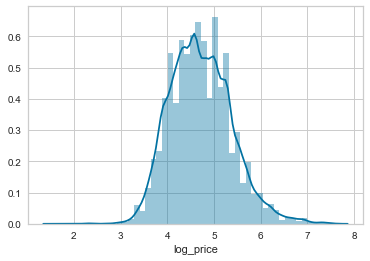

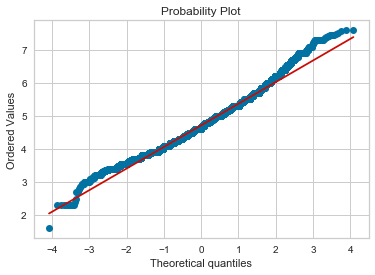

In [823]:
sns.distplot(model_df['log_price'], kde=True,);
fig = plt.figure()
res = stats.probplot(model_df['log_price'], plot=plt)
#skewness and kurtosis
print("Skewness: %f" % model_df['log_price'].skew())
print("Kurtosis: %f" % model_df['log_price'].kurt())

In [889]:
print("price median:",model_df['log_price'].median())
print("price mean:",model_df['log_price'].mean())

print("non-log dollar median:",np.exp(model_df['log_price']).median())
print("non-log dollar mean:",np.exp(model_df['log_price']).mean())


price median: 4.653960350157523
price mean: 4.718490608290067
non-log dollar median: 104.99999999999997
non-log dollar mean: 142.65015311981625


In [9]:
model_df['non_log_price'] = np.exp(model_df['log_price'])

In [10]:
model_df['non_log_price'].mean()

count    31518.000000
mean       142.511771
std        129.828107
min          5.000000
25%         70.000000
50%        105.000000
75%        175.000000
max       1999.000000
Name: non_log_price, dtype: float64

In [11]:
# If MAE in models below is about 40$ and the mean is 142$ = 28% error....
44/142

0.30985915492957744

# Models with 'model_df_with_census'
- This df is smaller ~22k becuase I did not want to fill 1/3 of the data with median for household income and house value

### Split df into test and train sets


In [552]:
# Create feature matrix with patsy- this way we get an intercept
y_census, X_census = patsy.dmatrices('log_price ~ accommodates + bathrooms + cleaning_fee + host_identity_verified + host_response_rate + instant_bookable + number_of_reviews + review_scores_rating + bedrooms + beds + amenity_count + tourism_mentions + cancellation_policy_moderate + cancellation_policy_strict + property_type_House + property_type_Other + bed_type + room_type_Private_room + room_type_Shared_room + median_home_val + median_income', data=model_df_with_census, return_type="dataframe")


In [590]:
#test_size 80-20 split
X_train_census, X_test_census, y_train_census, y_test_census = train_test_split(X_census, y_census, test_size=0.2,random_state=42)
X_train_census.shape[0] + X_test_census.shape[0] == model_df_with_census.shape[0]
type(X_train_census)

pandas.core.frame.DataFrame

## OLS Using StatsModel

In [563]:
# Create model
model_census_sm = sm.OLS(y_train_census,X_train_census)

# Fit model to training set
fit_census = model_census_sm.fit()

# Print fit summary
fit_census.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1342.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:54:30   Log-Likelihood:                -10002.
No. Observations:               18248   AIC:                         2.005e+04
Df Residuals:                   18226   BIC:                         2.022e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.3023      0.067     49.565      0.000       3.172       3.433
accommodates                     0.1006      0.003     29.733      0.000       0.094       0.107
bathrooms                        0.1055      0.009     11.787      0.000       0.088       0.123
cleaning_fee                    -0.0209      0.007     -2.814      0.005      -0.035      -0.006
host_identity_verified          -0.0172      0.007     -2.584      0.010      -0.030      -0.004
host_response_rate              -0.0003      0.000     -1.062      0.288      -0.001       0.000
instant_bookable                -0.0396      0.007     -5.381      0.000      -0.054      -0.025
number_of_reviews               -0.0004      0.000     -4.273      0.000      -0.001      -0.000
review_scores_rating             0.0058      0.001     10.000      0.000       0.005       0.007
bedrooms                         0.0986      0.006     15.794      0.000       0.086       0.111
beds                            -0.0318      0.005     -5.825      0.000      -0.043      -0.021
amenity_count                    0.0055      0.001     10.303      0.000       0.004       0.007
tourism_mentions                 0.0175      0.005      3.416      0.001       0.007       0.027
cancellation_policy_moderate    -0.0455      0.009     -5.126      0.000      -0.063      -0.028
cancellation_policy_strict      -0.0108      0.008     -1.330      0.183      -0.027       0.005
property_type_House             -0.1008      0.012     -8.558      0.000      -0.124      -0.078
property_type_Other              0.1289      0.013     10.090      0.000       0.104       0.154
bed_type                         0.0310      0.019      1.661      0.097      -0.006       0.067
room_type_Private_room          -0.5230      0.008    -66.774      0.000      -0.538      -0.508
room_type_Shared_room           -0.8098      0.021    -39.165      0.000      -0.850      -0.769
median_home_val               5.459e-07   2.46e-08     22.232      0.000    4.98e-07    5.94e-07
median_income                 4.121e-06   1.79e-07     22.991      0.000    3.77e-06    4.47e-06
==============================================================================
Omnibus:                     3307.943   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20241.403
Skew:                           0.732   Prob(JB):                         0.00
Kurtosis:                       7.948   Cond. No.                     1.51e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+07. This might indicate that there are
s

In [560]:
# Check for VIFs of each feature, then save to its own DF
vif_census = pd.DataFrame()
vif_census["VIF Factor"] = [variance_inflation_factor(X_census.values, i) for i in range(X.shape[1])]
vif_census["features"] = X_census.columns

In [562]:
vif
# Looks like beds + accomodates share variance-- LASSO to remove some of that next

,VIF Factor,features
0,460.584827,Intercept
1,3.846644,accommodates
2,1.329356,bathrooms
3,1.201397,cleaning_fee
4,1.077390,host_identity_verified
5,1.007996,host_response_rate
6,1.061315,instant_bookable
7,1.145383,number_of_reviews
8,1.053894,review_scores_rating
9,2.113643,bedrooms


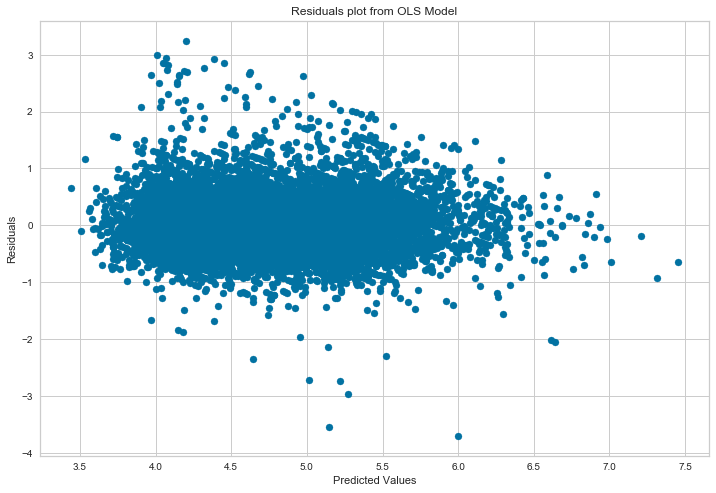

In [898]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(12,8))
plt.scatter(fit_census.predict(), fit_census.resid); # print resids vs predictions
plt.title("Residuals plot from OLS Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.savefig('LR_Residual_Plot')

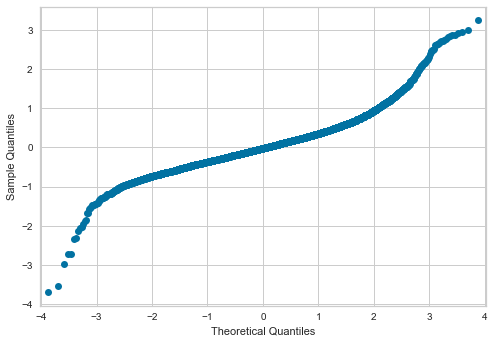

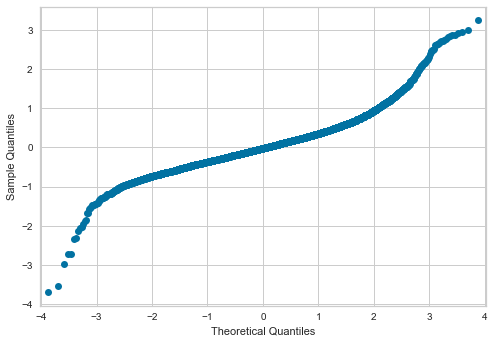

In [816]:
sm.qqplot(fit_census.resid)

# Prepare and run LASSO CV (this ended up being final model)

In [565]:
## Standard scale the data
std = StandardScaler()
std.fit(X_train_census.values) # only std.fit on train set

StandardScaler(copy=True, with_mean=True, with_std=True)

In [566]:
# Scale the Predictors on both the train and test set
# std.transform on test set and train set

X_tr_census = std.transform(X_train_census.values)
X_te_census = std.transform(X_test_census.values) # holding til test phase

In [614]:
# Here had to use np.ravel() to get y_train_census data to the correct shape (n,)..no # to right of ,
y_train_census = np.ravel(y_train_census)

In [641]:
y_test_census = np.ravel(y_test_census)

In [827]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200) # vector of potential alpha canidates (like pairs). Start with range then can hone in

lasso_model_census = LassoCV(alphas = alphavec, cv=5) # Finds best alfpha, cv= # of validation folds (5 or 10 best)

lasso_model_census.fit(X_tr_census, y_train_census) # Fit with stdz x_train (x_tr) and y_train



LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [829]:
lasso_model_census.alpha_

0.01

In [830]:
lasso_betas = list(zip(X_train_census.columns, lasso_model_census.coef_))
lasso_betas

[('Intercept', 0.0),
 ('accommodates', 0.16305003742242696),
 ('bathrooms', 0.03301721726282954),
 ('cleaning_fee', -0.0),
 ('host_identity_verified', -0.0),
 ('host_response_rate', -0.0),
 ('instant_bookable', -0.0070620837141663175),
 ('number_of_reviews', -0.007624103151961442),
 ('review_scores_rating', 0.025281288562685984),
 ('bedrooms', 0.05634987301708012),
 ('beds', -0.0),
 ('amenity_count', 0.02191534910370009),
 ('tourism_mentions', 0.0017022379873568394),
 ('cancellation_policy_moderate', -0.008016154721127218),
 ('cancellation_policy_strict', 0.0),
 ('property_type_House', -0.02042813282438154),
 ('property_type_Other', 0.023702001068355363),
 ('bed_type', 0.0),
 ('room_type_Private_room', -0.2526150851184903),
 ('room_type_Shared_room', -0.12106371151150641),
 ('median_home_val', 0.11066141217920637),
 ('median_income', 0.11262000500289776)]

## Metrics from this model

In [831]:
# R2 of Training set
lasso_model_census.score(X_tr_census,y_train_census)

0.6035891312610048

In [832]:
y_census_pred = lasso_model_census.predict(X_te_census)

In [833]:
# R2 of test set using this model
r2_score(y_test_census, y_census_pred)

0.6233264396700027

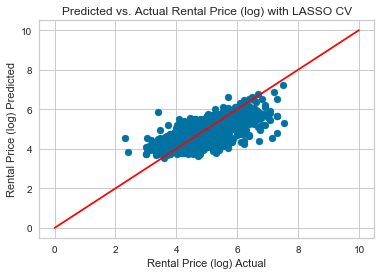

In [877]:
plt.scatter(y_test_census, y_census_pred)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Rental Price (log) with LASSO CV')
plt.ylabel('Rental Price (log) Predicted')
plt.xlabel('Rental Price (log) Actual');

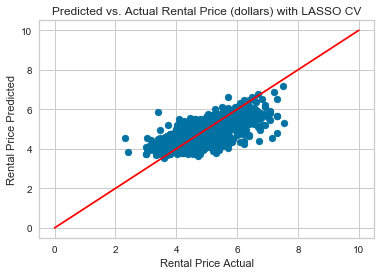

In [876]:
plt.scatter(y_test_census, y_census_pred)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Rental Price (dollars) with LASSO CV')
plt.ylabel('Rental Price Predicted')
plt.xlabel('Rental Price Actual');

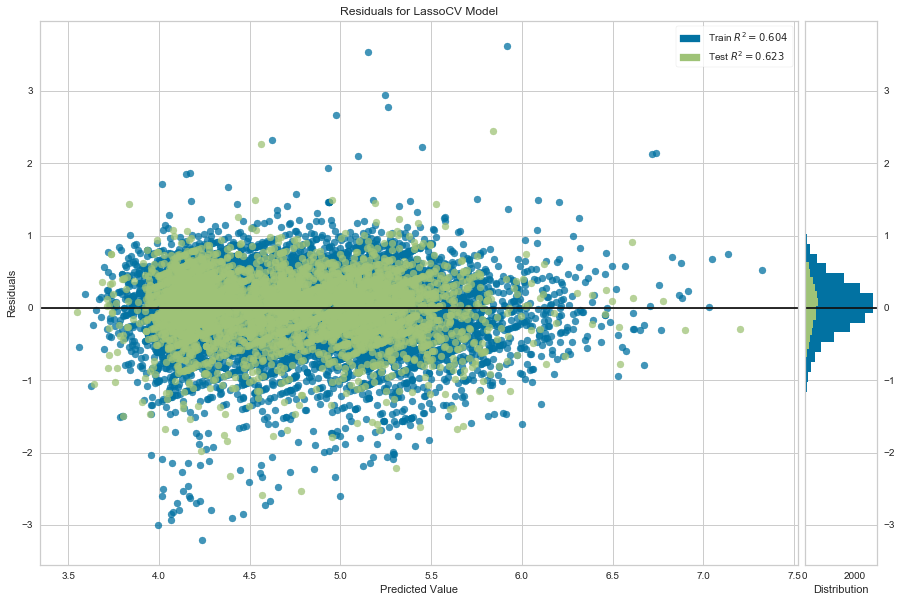

In [900]:
visualizer = ResidualsPlot(lasso_model_census, size=(1080, 720))
visualizer.fit(X_tr_census, y_train_census)  # Fit the training data to the visualizer
visualizer.score(X_te_census, y_test_census)  # Evaluate the model on the test data
visualizer.show(outpath="LassoModelResiduals")  # Finalize and render the figure

In [837]:
#Mean Absolute Error (MAE) function used later
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) # mean of the absolute value of predicted values - true values

In [838]:
# MAE with log prices (useless)
mae(y_test_census, y_census_pred)

0.30785711103514324

In [839]:
y_test_census_exp = np.exp(y_test_census)

In [840]:
y_census_pred_exp = np.exp(y_census_pred)

In [841]:
# MAE on antilog price
mae(y_test_census_exp,y_census_pred_exp)

44.87788370231528

## Yellowbrick Prediction Error Plot

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


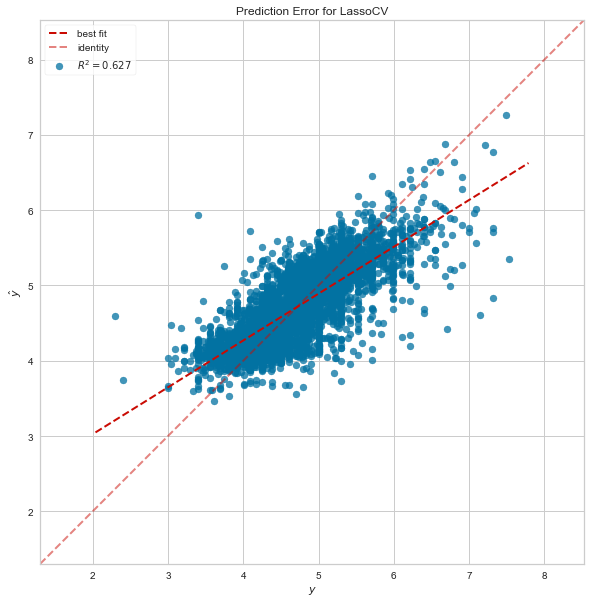

In [908]:
# Instantiate the linear model and visualizer
model = LassoCV()
visualizer = PredictionError(model, cv=5, line_color='r', point_color='b',size=(1080, 720))

visualizer.fit(X_tr_census, y_train_census) # Fit the training data to the visualizer
visualizer.score(X_te_census, y_test_census)  # Evaluate the model on the test data
visualizer.show(outpath="LassoCV_Prediction_yellowbrickplot")                 # Finalize and render the figure

Computing regularization path using the LARS ...


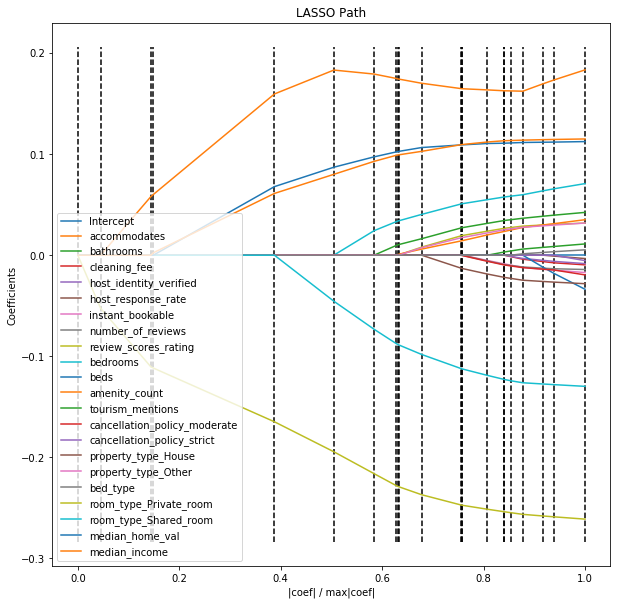

In [752]:
# # ## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr_census, y_train_census, method='lasso')

# # plotting the LARS path
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train_census.columns)
plt.show()

# Ridge CV with census df

In [903]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200) # vector of potential alpha canidates (like pairs). Start with range then can hone in

ridge_model_census = RidgeCV(alphas = alphavec, cv=5) # Finds best alfpha, cv= # of validation folds (5 or 10 best)

ridge_model_census.fit(X_tr_census, y_train_census) # Fit with stdz x_train (x_tr) and y_train

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [904]:
ridge_model_census.alpha_

30.01835813575589

In [907]:
ridge_betas = list(zip(X_train_census.columns, ridge_model_census.coef_))
ridge_betas

[('Intercept', 0.0),
 ('accommodates', 0.18257604920352322),
 ('bathrooms', 0.04224872684573968),
 ('cleaning_fee', -0.009462647153435004),
 ('host_identity_verified', -0.008297476338825348),
 ('host_response_rate', -0.0033063389953990083),
 ('instant_bookable', -0.017194506184044358),
 ('number_of_reviews', -0.01416542483790591),
 ('review_scores_rating', 0.03175872604164486),
 ('bedrooms', 0.07063556914918262),
 ('beds', -0.03278575983549738),
 ('amenity_count', 0.0350896374278242),
 ('tourism_mentions', 0.01116005941760688),
 ('cancellation_policy_moderate', -0.019443584032433556),
 ('cancellation_policy_strict', -0.005286186286926314),
 ('property_type_House', -0.028240781363493048),
 ('property_type_Other', 0.031786609141897036),
 ('bed_type', 0.005373444344973904),
 ('room_type_Private_room', -0.26062752507796283),
 ('room_type_Shared_room', -0.12948616950886546),
 ('median_home_val', 0.11231999080117686),
 ('median_income', 0.11492360211717569)]

In [906]:
ridge_model_census.score(X_tr_census,y_train_census)

0.6071855295918607

In [846]:
y_census_pred_ridge = ridge_model_census.predict(X_te_census)

In [847]:
# R2 of test set using this model
r2_score(y_test_census, y_census_pred_ridge)

0.6269058609516531

In [848]:
y_test_census_exp = np.exp(y_test_census)

In [849]:
y_census_pred_ridge_exp = np.exp(y_census_pred_ridge)

In [850]:
# mean of the absolute value of predicted values - true values
mae(y_test_census_exp, y_census_pred_ridge_exp)

44.58395232098763

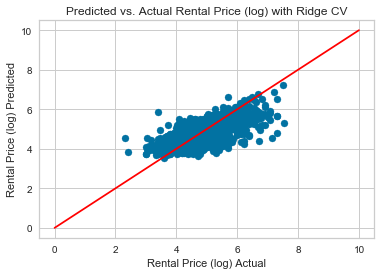

In [882]:
plt.scatter(y_test_census, y_census_pred)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.title('Predicted vs. Actual Rental Price (log) with Ridge CV')
plt.ylabel('Rental Price (log) Predicted')
plt.xlabel('Rental Price (log) Actual');

In [853]:
model_df['antilog_price'] = np.exp(model_df['log_price'])

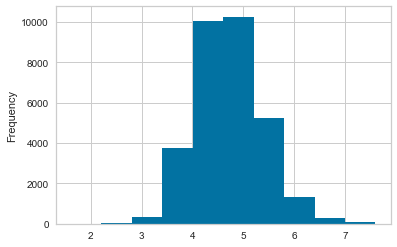

In [854]:
model_df.log_price.plot(kind='hist')

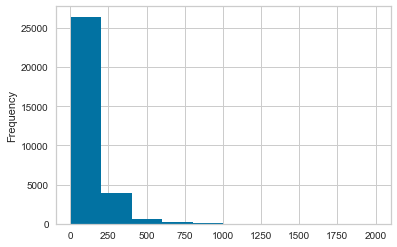

In [855]:
model_df.antilog_price.plot(kind='hist')

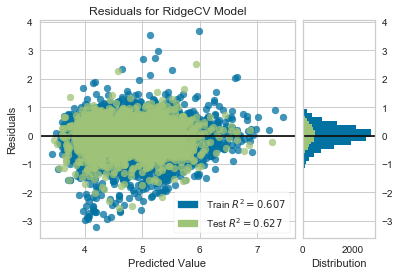

In [856]:
visualizer = ResidualsPlot(ridge_model_census)
visualizer.fit(X_tr_census, y_train_census)  # Fit the training data to the visualizer
visualizer.score(X_te_census, y_test_census)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

___

___

# Using original df without census inputs
- Larger DF, no income or home values
- DID NOT USE THESE IN THE END BECAUSE CENSUS INFO TURNED OUT TO BE STRONG PREDICTORS. Models from above used instead.

# OLS using SM
- Using all base variables, will remove some if needed after these models
- Removed valence total

In [685]:
# Create feature matrix with patsy- this way we get an intercept
y, X = patsy.dmatrices('log_price ~ accommodates + bathrooms + cleaning_fee + host_identity_verified + host_response_rate + instant_bookable + number_of_reviews + review_scores_rating + bedrooms + beds + amenity_count + tourism_mentions + cancellation_policy_moderate + cancellation_policy_strict + property_type_House + property_type_Other + bed_type + room_type_Private_room + room_type_Shared_room', data=model_df, return_type="dataframe")

In [686]:
#test_size 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train.shape[0] + X_test.shape[0] == model_df.shape[0]

True

#### Only use X,y do not use X_test, y_test yet

In [687]:
# Create model
model1_sm = sm.OLS(y_train,X_train)

# Fit model to training set
fit = model1_sm.fit()

# Print fit summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1485.
Date:                Wed, 09 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:02:57   Log-Likelihood:                -15623.
No. Observations:               25078   AIC:                         3.129e+04
Df Residuals:                   25058   BIC:                         3.145e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.8133      0.060     63.088      0.000       3.695       3.932
accommodates                     0.0947      0.003     31.713      0.000       0.089       0.101
bathrooms                        0.1316      0.008     15.986      0.000       0.115       0.148
cleaning_fee                    -0.0138      0.007     -2.020      0.043      -0.027      -0.000
host_identity_verified          -0.0147      0.006     -2.406      0.016      -0.027      -0.003
host_response_rate              -0.0003      0.000     -1.167      0.243      -0.001       0.000
instant_bookable                -0.0602      0.007     -8.839      0.000      -0.074      -0.047
number_of_reviews               -0.0004    9.3e-05     -4.410      0.000      -0.001      -0.000
review_scores_rating             0.0075      0.001     14.026      0.000       0.006       0.009
bedrooms                         0.0897      0.006     15.548      0.000       0.078       0.101
beds                            -0.0368      0.005     -7.371      0.000      -0.047      -0.027
amenity_count                    0.0056      0.000     11.503      0.000       0.005       0.007
tourism_mentions                 0.0731      0.005     15.297      0.000       0.064       0.083
cancellation_policy_moderate    -0.0502      0.008     -6.158      0.000      -0.066      -0.034
cancellation_policy_strict      -0.0026      0.007     -0.347      0.728      -0.017       0.012
property_type_House             -0.2051      0.011    -19.009      0.000      -0.226      -0.184
property_type_Other              0.1025      0.012      8.789      0.000       0.080       0.125
bed_type                         0.0398      0.017      2.293      0.022       0.006       0.074
room_type_Private_room          -0.6390      0.007    -91.994      0.000      -0.653      -0.625
room_type_Shared_room           -0.9169      0.020    -46.315      0.000      -0.956      -0.878
==============================================================================
Omnibus:                     2922.691   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10250.144
Skew:                           0.576   Prob(JB):                         0.00
Kurtosis:                       5.913   Cond. No.                     2.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Exploration of some of the variables from above model

In [688]:
# Check for VIFs of each feature, then save to its own DF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [689]:
X.values

array([[1., 3., 1., ..., 1., 0., 0.],
       [1., 7., 1., ..., 1., 0., 0.],
       [1., 5., 1., ..., 1., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 5., 1., ..., 1., 0., 0.],
       [1., 2., 1., ..., 1., 0., 0.]])

In [690]:
# Looks decent, nothing too much higher than 3...Still some multicorr between variables I will examine furher after\
# I see what LASSO does
vif

,VIF Factor,features
0,451.675348,Intercept
1,3.734439,accommodates
2,1.309640,bathrooms
3,1.200686,cleaning_fee
4,1.074756,host_identity_verified
5,1.007984,host_response_rate
6,1.053958,instant_bookable
7,1.141900,number_of_reviews
8,1.050465,review_scores_rating
9,2.122882,bedrooms


### Use statsmodels to plot the residuals vs the fitted values
- Does not really look random... Almost looks bimodal
- What am I missing? What can account for?

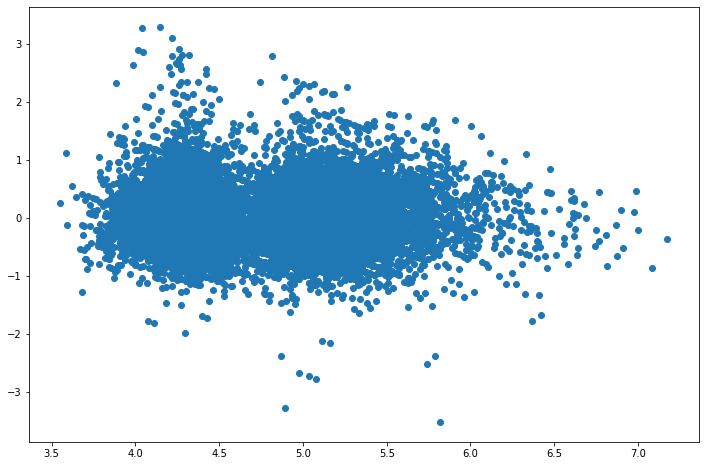

In [691]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid); # print resids vs predictions

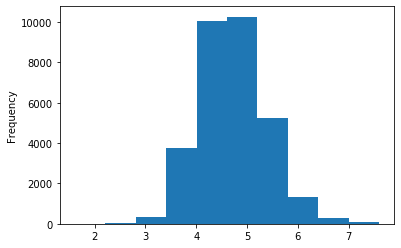

In [692]:
model_df.log_price.plot(kind='hist')

# Sklearn models

## LASSO CV
- Doing LASSO first to see which features I may not need

### Standardize variables before regularization

In [694]:
# ## Standard scale the data
std = StandardScaler()
std.fit(X_train.values) # only std.fit on train set

StandardScaler(copy=True, with_mean=True, with_std=True)

In [695]:
# Scale the Predictors on both the train and test set
# std.transform on test set and train set

X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values) # holding til test phase

In [701]:
y_train = np.ravel(y_train)

In [703]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,200) # vector of potential alpha canidates (like pairs). Start with range then can hone in

lasso_model = LassoCV(alphas = alphavec, cv=5, verbose=True) # Finds best alfpha, cv= # of validation folds (5 or 10 best)

lasso_model.fit(X_tr, y_train) # Fit with stdz x_train (x_tr) and y_train

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=True)

In [704]:
# Best alpha from LASSO CV
lasso_model.alpha_

0.01

In [705]:
lasso_model.score

<bound method RegressorMixin.score of LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=True)>

In [707]:
y_pred = lasso_model.predict(X_te)

In [708]:
y_pred

array([5.2335653 , 5.18383735, 4.31817122, ..., 5.65058365, 4.31814978,
       5.17619747])

In [709]:
# R2 of test set using this model
r2_score(y_test, y_pred)

0.5339133474024391

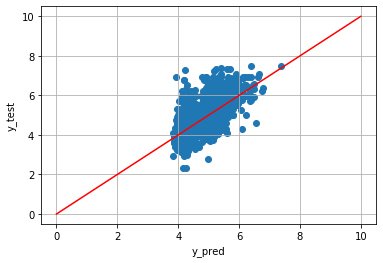

In [806]:
plt.scatter(y_pred,y_test)
plt.plot([0,10],[0,10],color='red')
plt.grid(True)
plt.xlabel('y_pred')
plt.ylabel('y_test');

In [732]:
y_test.shape

(6270,)

In [733]:
y_pred.shape

(6270,)

In [716]:
y_test = np.ravel(y_test)

In [717]:
y_pred = np.ravel(y_pred)

In [734]:
# MAE with log prices
mae(y_test,y_pred)

0.34373957061065347

In [720]:
y_test_exp = np.exp(y_test)

In [721]:
y_pred_exp = np.exp(y_pred)

In [735]:
mae(y_test_exp,y_pred_exp)

51.57106072634456

In [706]:
# These are the (standardized) coefficients found
# when it refit using that best alpha
lasso_betas = list(zip(X_train.columns, lasso_model.coef_))
lasso_betas

[('Intercept', 0.0),
 ('accommodates', 0.1525872863396846),
 ('bathrooms', 0.04206107810975645),
 ('cleaning_fee', -0.0),
 ('host_identity_verified', -0.0),
 ('host_response_rate', -0.0),
 ('instant_bookable', -0.015603964363529205),
 ('number_of_reviews', -0.00596817116962368),
 ('review_scores_rating', 0.03400622624343852),
 ('bedrooms', 0.04830513611677742),
 ('beds', -0.0),
 ('amenity_count', 0.02359512650293904),
 ('tourism_mentions', 0.033601860840695656),
 ('cancellation_policy_moderate', -0.011186224531385682),
 ('cancellation_policy_strict', 0.0),
 ('property_type_House', -0.04852154423670492),
 ('property_type_Other', 0.017733250607813066),
 ('bed_type', 0.0),
 ('room_type_Private_room', -0.30924465133059514),
 ('room_type_Shared_room', -0.1317482124463844)]

In [729]:
y_pred = lasso_model.predict(X_te)

In [730]:
y_pred.reshape(-1,1)

array([[5.2335653 ],
       [5.18383735],
       [4.31817122],
       ...,
       [5.65058365],
       [4.31814978],
       [5.17619747]])

In [102]:
# # plotting the LARS path

# xx = np.sum(np.abs(coefs.T), axis=1)
# xx /= xx[-1]

# plt.figure(figsize=(10,10))
# plt.plot(xx, coefs.T)
# ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
# plt.xlabel('|coef| / max|coef|')
# plt.ylabel('Coefficients')
# plt.title('LASSO Path')
# plt.axis('tight')
# plt.legend(X_train.columns)
# plt.show()

In [311]:
#Mean Absolute Error (MAE) function used later
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) # mean of the absolute value of predicted values - true values

#mae(y_test, test_set_pred)
# "off by" x units

In [55]:
#lasso_model.score--- afterafter testing

## LASSO CV dropped some features. This reflects the ones with poor starting corrs
- Next step is to feature engineer and go back to this to try to see if we can keep some in but in a better way
- There are some that have ceiling effects etc.
- Transform some of those

# Ridge + Ridge CV

In [70]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec2 = 10**np.linspace(-2,2,200) # vector of potential alpha canidates (like pairs). Start with range then can hone in

ridge_model = RidgeCV(alphas = alphavec, cv=5) # Finds best alfpha, cv= # of validation folds (5 or 10 best)

ridge_model.fit(X_tr, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [71]:
# Best alpha from Ridge CV
ridge_model.alpha_

14.314589375234785

In [80]:
ridge_betas = list(zip(X_train.columns, ridge_model.coef_))
print(ridge_model.coef_)
print(X_train.columns)

[[ 0.00000000e+00  1.73937096e-01  5.19560834e-02 -5.71157410e-03
  -6.65052398e-03 -3.33902904e-03 -2.60831203e-02 -1.30591917e-02
   4.10526135e-02  6.44795346e-02 -3.87080473e-02  3.66216510e-02
   4.41833787e-02 -5.87194802e-03 -2.08018326e-02 -3.14876583e-04
  -5.67049498e-02  2.53366732e-02  6.66991892e-03 -3.18919255e-01
  -1.39802119e-01]]
Index(['Intercept', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'amenity_count', 'tourism_mentions', 'valence_total',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'property_type_House', 'property_type_Other', 'bed_type',
       'room_type_Private_room', 'room_type_Shared_room'],
      dtype='object')


# Using gridsearchcv
- Once you get best estimator that is the best model via gridsearch, apply that to .predict()

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {'alpha':np.linspace(0.0,1.0,10)} 
#keys correspond to keyword args allowed for model you're trying to fit
#Ridge, for example, is alpha

### Ridge model with grid search cv

In [61]:
my_model = Ridge()
my_grid_search = GridSearchCV(my_model,param_grid,cv=5,n_jobs=-1)

# ridge with feature scaling
# use existing X_tr and X_te scaled values used for lasso and ridge cv
my_grid_search.fit(X_tr, y_train) # training scaled on Y scaled


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
ridge_grid_search_model = my_grid_search.best_estimator_
print(ridge_grid_search_model)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [84]:
ridge_grid_search_model.coef_

array([[ 0.        ,  0.17411888,  0.05200295, -0.00574433, -0.00665834,
        -0.00333951, -0.02608328, -0.01305284,  0.04106779,  0.06454739,
        -0.03900561,  0.03663033,  0.04420039, -0.00588221, -0.02082395,
        -0.00033924, -0.05670779,  0.02534602,  0.00665007, -0.31911894,
        -0.13989838]])

### Lasso model with grid search cv

In [87]:
my_model_2 = Lasso()
param_grid = {'alpha':np.linspace(0.0,1.0,10)} 
my_grid_search2 = GridSearchCV(my_model_2,param_grid,cv=5,n_jobs=-1)

# ridge with feature scaling
# use existing X_tr and X_te scaled values used for lasso and ridge cv
my_grid_search2.fit(X_tr, y_train) # training scaled on Y scaled

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2551.6222497648714, tolerance: 1.0849859541042892
  positive)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [88]:
lasso_grid_search_model = my_grid_search2.best_estimator_
print(lasso_grid_search_model)

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [89]:
lasso_grid_search_model.coef_

array([ 0.        ,  0.17413258,  0.05200647, -0.0057468 , -0.00665893,
       -0.00333955, -0.02608329, -0.01305236,  0.04106893,  0.0645525 ,
       -0.03902803,  0.03663098,  0.04420166, -0.00588298, -0.02082562,
       -0.00034108, -0.05670801,  0.02534673,  0.00664857, -0.31913395,
       -0.13990561])

# Based on above models, creating a new df dealing with colinearity and deleting low value variables

# New model y2, X2 via patsy

In [124]:
# Create feature matrix with patsy- this way we get an intercept
y2, X2 = patsy.dmatrices('log_price ~ accommodates + bathrooms + instant_bookable + number_of_reviews + review_scores_rating + bedrooms + amenity_count + tourism_mentions + room_type_Private_room + room_type_Shared_room', data=model_df, return_type="dataframe")

## Split y2 X2

In [125]:
#test_size 80-20 split
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X2, y2, test_size=0.2,random_state=42)
X_train_mod.shape[0] + X_test_mod.shape[0] == model_df.shape[0]

True

## Standardize X2 splits

In [126]:
std = StandardScaler()
std.fit(X_train_mod.values) # FIT THE STD SCALER on training only

StandardScaler(copy=True, with_mean=True, with_std=True)

In [127]:
X_train_mod_scaled = std.transform(X_train_mod.values)
X_test_mod_scaled = std.transform(X_test_mod.values)

## Run second Ridge CV model w/ reduced features

In [131]:
# 2nd Ridge CV model
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec_ridge2 = 10**np.linspace(-2,2,200) # vector of potential alpha canidates (like pairs). Start with range then can hone in

ridge_model2 = RidgeCV(alphas = alphavec_ridge2, cv=5) # Finds best alfpha, cv= # of validation folds (5 or 10 best)

ridge_model2.fit(X_train_mod_scaled, y_train_mod)


RidgeCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [132]:
ridge_model2.alpha_

20.72921779595372

In [137]:
ridge_model2_betas = list(zip(X_train_mod.columns, ridge_model.coef_))
print(X_train.columns)
print(ridge_model.coef_)

Index(['Intercept', 'accommodates', 'bathrooms', 'cleaning_fee',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'amenity_count', 'tourism_mentions', 'valence_total',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'property_type_House', 'property_type_Other', 'bed_type',
       'room_type_Private_room', 'room_type_Shared_room'],
      dtype='object')
[[ 0.00000000e+00  1.73937096e-01  5.19560834e-02 -5.71157410e-03
  -6.65052398e-03 -3.33902904e-03 -2.60831203e-02 -1.30591917e-02
   4.10526135e-02  6.44795346e-02 -3.87080473e-02  3.66216510e-02
   4.41833787e-02 -5.87194802e-03 -2.08018326e-02 -3.14876583e-04
  -5.67049498e-02  2.53366732e-02  6.66991892e-03 -3.18919255e-01
  -1.39802119e-01]]


# Run second regular OLS model with smaller feature set

In [142]:
X_train_mod.columns

Index(['Intercept', 'accommodates', 'bathrooms', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'amenity_count', 'tourism_mentions', 'room_type_Private_room',
       'room_type_Shared_room'],
      dtype='object')

In [144]:
# Create model
model2_sm = sm.OLS(y_train_mod,X_train_mod)

# Fit model to training set
fit2 = model2_sm.fit()

# Print fit summary
fit2.summary()

# Here reducing some features made the OLS worse....
# Need to figure out how to get MAE/R2 on above models to see if it improved ridge

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2691.
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:42:50   Log-Likelihood:                -15935.
No. Observations:               25078   AIC:                         3.189e+04
Df Residuals:                   25067   BIC:                         3.198e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.7869      0.053     72.045      0.000       3.684       3.890
accommodates               0.0819      0.002     33.445      0.000       0.077       0.087
bathrooms                  0.1126      0.008     13.735      0.000       0.097       0.129
instant_bookable          -0.0595      0.007     -8.732      0.000      -0.073      -0.046
number_of_reviews         -0.0006   9.12e-05     -6.638      0.000      -0.001      -0.000
review_scores_rating       0.0079      0.001     14.557      0.000       0.007       0.009
bedrooms                   0.0696      0.006     12.595      0.000       0.059       0.080
amenity_count              0.0050      0.000     10.390      0.000       0.004       0.006
tourism_mentions           0.0768      0.005     15.949      0.000       0.067       0.086
room_type_Private_room    -0.6497      0.007    -93.847      0.000      -0.663      -0.636
room_type_Shared_room     -0.9428      0.020    -48.344      0.000      -0.981      -0.905
==============================================================================
Omnibus:                     2976.704   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10035.282
Skew:                           0.599   Prob(JB):                         0.00
Kurtosis:                       5.858   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""